<a href="https://colab.research.google.com/github/SamuelRoblesArce/Machine_Learning/blob/main/8_KerasDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de Modelos de Deep Learning con Keras**

Basado en: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

Cinco pasos a utilizar con Keras:

- Definir el modelo (arquitectura).
- Compilar el modelo.
- Ajustar el modelo (fit).
- Evaluar el modelo.
- Hacer predicciones.

**Definir el Modelo**


Implica la definición de las capas del modelo, configurar cada capa con un número de nodos y funciones de activación y conectar las capas en un modelo compacto.

In [ ]:
# definir el modelo
model = ...

**Compilar el modelo**

Implica llamar una función para compilar el modelo con una configuración dada, la cual preparará las estructuras de datos requeridas para el uso eficiente del modelo.

El optimizador se puede especificar como strings, ejemplo: ‘sgd‘ o se puede configurar una instancia de una clase optimizadora.

In [ ]:
# compilar el modelo
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy')

Las tres funciones de perdida (loss) más comunes son::

- ‘binary_crossentropy‘ para clasificación binaria.
- ‘sparse_categorical_crossentropy‘ para clasificación multiclase.
- ‘mse‘ (mean squared error) para regresión.

Métricas son definidas como listas de strings o una lista de funciones para evaluar predicciones.

In [ ]:
# compilar el modelo
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

**Ajustar el Modelo (fit - aprendizaje)**

Para ajustar el modelo se requiere seleccionar la configuración de entrenamiento, el número de épocas (cuantas veces se recorrerá el dataset) y tamaño de batch (número de muestras en cada época para estimar el error del modelo).


In [ ]:
# ajustar el modelo (aprendizaje)
model.fit(X, y, epochs=100, batch_size=32)

 Se puede hacer el reporte del desempeño del modelo en cada época, utilizando el argumento “verbose” a 2. Todas las salidas pueden ser apagadas durante entrenamiento, definiendo “verbose” a 0.

In [ ]:
# ajustar el modelo
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

**Evaluar el Modelo**

Requiere haber separado una parte del dataset para evaluar el modelo.

En la API, implica llamar una función con el conjunto separado para pruebas y obtener la pérdida y métricas  que pueden ser reportadas.

In [ ]:
# evaluar el modelo
loss = model.evaluate(X, y, verbose=0)

**Hacer una predicción**

Paso final del ciclo de vida.

Se requiere datos nuevos para los que se hará una predicción (sin valores target u objetivos).

En términos de API, implica llamar una función para hacer la predicción de una clase, probabilidad o valor numérico.



In [ ]:
# hacer una predicción
yhat = model.predict(X)

**1.Deep MLP para clasificación binaria**


Se usuará el dataset Ionosphere para clasificación binaria (dos -clases) : https://archive.ics.uci.edu/ml/datasets/ionosphere

Este dataset implica predecir si una estructura está o no en la atmosfera, de acuerdo a los datos retornados por radares.

In [ ]:
# mlp para clasificación binaria
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [ ]:
# carga dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = pd.read_csv(url, header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
# divide datos en X, y (target)
X, y = df.values[:, :-1], df.values[:, -1]
# garantiza que los datos sean flotantes
X = X.astype('float32')

In [ ]:
# codifica cadenas a enteros
y = LabelEncoder().fit_transform(y)


In [ ]:
y[:4]

array([1, 0, 1, 0])

In [ ]:
# divide conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(235, 34) (116, 34) (235,) (116,)


In [ ]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0])

**Modelo**

In [ ]:
# determina el número de características de entrada
n_features = X_train.shape[1] # 34



In [ ]:
# define el modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 667 (2.61 KB)

 Trainable params: 667 (2.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ajustar el modelo (aprendizaje)
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)


In [ ]:
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy prueba: %.3f' % acc)
 #0.914

Accuracy prueba: 0.922


In [ ]:
import numpy as np

In [ ]:
# realizar una predicción
row =[1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict(np.array([row]))
print('Predicho: %.3f' % yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Predicho: 0.963


<ipython-input-16-da5762479d9d>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicho: %.3f' % yhat)


**2. Desarrollar modelos de Redes Neuronales Convolucionales**

Modelos con capas convolucionales que extraen características (llamadas mapas de características) y capas pooling que extraen elemenos más salientes de las características.

CNNs son adecuadas para tareas de clasificación de imágenes, aunque pueden ser usadas en otras tareas que tengan imágenes como entrada.

Una tarea de clasificación de imágenes popular es clasificación de digitos MNIST. Implica algunos miles de digitos escritos a mano que deben ser clasificados entre 0 y 9.

Modelos CNN reciben imágenes en formato de canales (channels) al final, cada ejemplo enviado a la red tiene dimensiones [rows, columns, channels], donde ``channels''
 representa los canales de color de los datos de la imagen(RGB).



El código carga las imágenes y muestra algunas de ellas.

In [ ]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Entrenamiento: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Prueba: X=%s, y=%s' % (testX.shape, testy.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Entrenamiento: X=(60000, 28, 28), y=(60000,)
Prueba: X=(10000, 28, 28), y=(10000,)


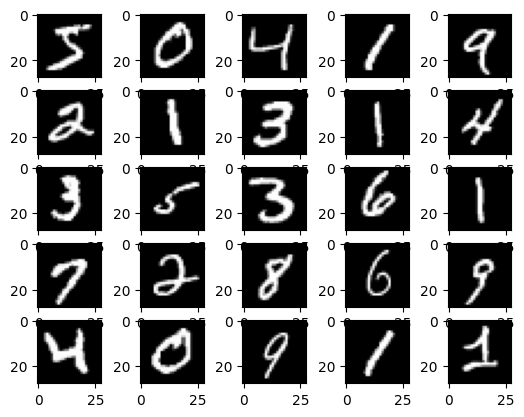

In [ ]:

# muestra algunas imágenes
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Librerías

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
import numpy as np


In [ ]:
# carga dataset
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape

(60000, 28, 28)

In [ ]:

# reshape datos para que tenga un solo canal
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determina la dimensión de las imágenes de entrada (28,28,1)
in_shape = x_train.shape[1:]
# determina el número de clases (10)
n_classes = len(np.unique(y_train))
print(in_shape, n_classes)


(28, 28, 1) 10


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# normalizar los valores de las intensidades de pixeles
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
# definir el  modelo
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape)) # 32 filtros de 3x3 en primera capa
model.add(MaxPool2D((2, 2)))
model.add(Flatten()) # transformación en un vector plano de datos para conectarse a una MLP
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # capa intermedia completamente conectada
model.add(Dropout(0.5)) # ayuda a atenuar el overfitting
model.add(Dense(n_classes, activation='softmax')) # 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# define perdida y optimizador
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #sparse_categorical_crossentropy espera que la clase Y sean enteros (no codificaciones one-hot )


In [ ]:
# ajusta el modelo (aprendizaje)
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)


In [ ]:
# evaluar el modelo
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc) #mientras más cercano a 1 mejor


Accuracy: 0.987


In [ ]:
# Hacer una predicción
image = x_test[200]
yhat = model.predict(np.asarray([image]))
print('Predicho: clase=%d' % np.argmax(yhat))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
Predicho: clase=3


In [ ]:
yhat

array([[1.1253918e-09, 4.9377874e-10, 1.5031523e-08, 9.9999857e-01,
        5.2831535e-14, 1.4198482e-06, 2.1383718e-11, 2.6443557e-12,
        2.2452409e-09, 1.7696369e-08]], dtype=float32)

In [ ]:
y_test[200]

3

**3. Recurrent Neural Network Models (RNNs, Redes Neuronales Recurrentes)**


- RNNs diseñadas para operar sobre secuencias de datos.

- El tipo más popular es la Long Short-Term Memory network (LSTM). LSTMs aceptan una secuencia de datos de entrada y hacen una predicción, por ejemplo asignar una clase o predecir un valor numérico (el próximo valor o valores de una secuencia).



Se usará un dataset de ventas de carros para demostrar una LSTM RNN para forecasting de series de tiempo univariada.

Este problema implica predecir el número de carros vendidos por mes.



Se utilizará una ventana de los últimos cinco meses de datos para predecir los datos del mes actual.

Por ejemplo, si la secuencia es:

In [ ]:
1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Entonces la muestra para entrenar el modelo sería:



In [ ]:

Input 				Output
1, 2, 3, 4, 5 		6
2, 3, 4, 5, 6 		7
3, 4, 5, 6, 7 		8

LSTMs esperan que cada ejemplo de entrenamiento tenga dos dimensiones; la primera es el número de time steps (pasos, en este caso 5) y la segunda es el número de observaciones para cada paso de tiempo (en este caso 1).

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
# divide una secuencia univariada en muestras
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and outpt parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.asarray(X), np.asarray(y)


In [ ]:
# carga el dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(url, header=0, index_col=0)
df.squeeze('columns')
df.head()

,Sales
Month,
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587


In [ ]:
# retorna los valores
values = df.values.astype('float32')
# specifica el tamaÑo de la ventana (window)
n_steps = 5
# divide en muestras
X, y = split_sequence(values, n_steps)

In [ ]:
X[:4]

array([[[ 6550.],
        [ 8728.],
        [12026.],
        [14395.],
        [14587.]],

       [[ 8728.],
        [12026.],
        [14395.],
        [14587.],
        [13791.]],

       [[12026.],
        [14395.],
        [14587.],
        [13791.],
        [ 9498.]],

       [[14395.],
        [14587.],
        [13791.],
        [ 9498.],
        [ 8251.]]], dtype=float32)

In [ ]:
y[:4]

array([[13791.],
       [ 9498.],
       [ 8251.],
       [ 7049.]], dtype=float32)

In [ ]:
# se hace el reshape a [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
X.shape

(103, 5, 1)

In [ ]:
# Divide en entrenamiento y prueba (no puede ser aleatoria en series de tiempo)
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(91, 5, 1) (12, 5, 1) (91, 1) (12, 1)


In [ ]:
# define el modelo # la arquitectura es many-to-one
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1))) # cada unidad de LSTM tendrá 100 unidades
model.add(Dense(50, activation='relu', kernel_initializer='he_normal')) #la última unidad LSTM (la quinta para este ejemplo) se conectará con una MLP completamente conectada
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compila el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # se usan funciones de costo y métricas de regresión

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,451 (189.26 KB)

 Trainable params: 48,451 (189.26 KB)

 Non-trainable params: 0 (0.00 B)

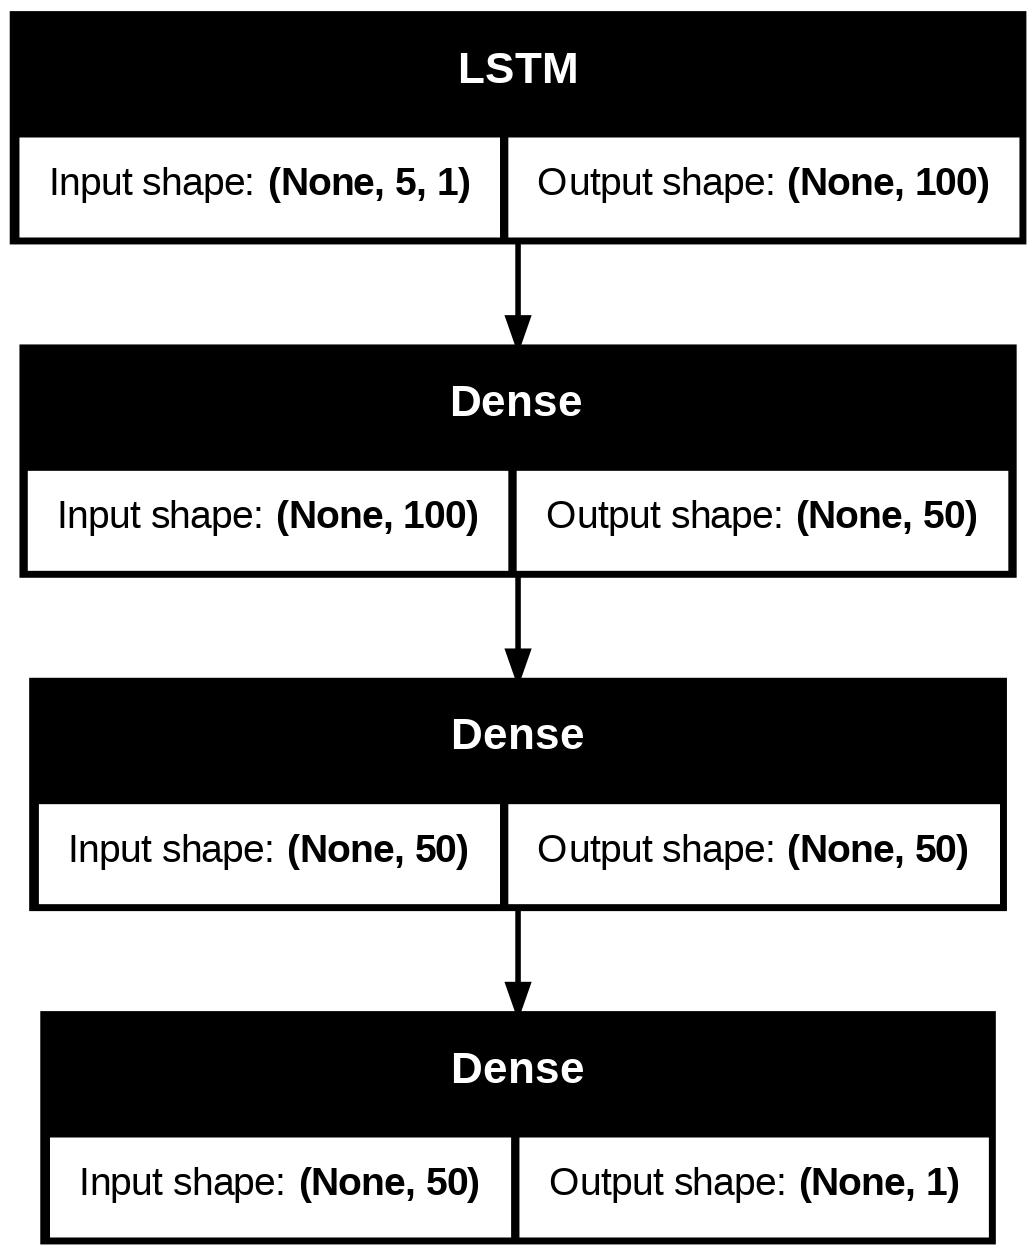

In [ ]:
plot_model(model, 'model.png', show_shapes=True)

In [ ]:
# ajusta el modelo (aprendizaje)
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_test, y_test))


Epoch 1/100
3/3 - 5s - 2s/step - loss: 471277824.0000 - mae: 19360.6113 - val_loss: 143182560.0000 - val_mae: 11319.8799
Epoch 2/100
3/3 - 2s - 572ms/step - loss: 63116168.0000 - mae: 6358.7446 - val_loss: 21136450.0000 - val_mae: 3926.1855
Epoch 3/100
3/3 - 0s - 17ms/step - loss: 45785796.0000 - mae: 5417.2114 - val_loss: 118960184.0000 - val_mae: 9893.7305
Epoch 4/100
3/3 - 0s - 18ms/step - loss: 95378456.0000 - mae: 8640.7021 - val_loss: 123649368.0000 - val_mae: 10022.2451
Epoch 5/100
3/3 - 0s - 18ms/step - loss: 64472368.0000 - mae: 6888.3198 - val_loss: 47952236.0000 - val_mae: 6023.4009
Epoch 6/100
3/3 - 0s - 17ms/step - loss: 19068508.0000 - mae: 3685.4766 - val_loss: 18224338.0000 - val_mae: 3362.4504
Epoch 7/100
3/3 - 0s - 16ms/step - loss: 14587534.0000 - mae: 2970.9343 - val_loss: 34426888.0000 - val_mae: 4635.8765
Epoch 8/100
3/3 - 0s - 14ms/step - loss: 28103198.0000 - mae: 4357.3384 - val_loss: 47046400.0000 - val_mae: 5821.3862
Epoch 9/100
3/3 - 0s - 18ms/step - loss: 3

In [ ]:
# evalua el modelo
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, np.sqrt(mse), mae)) # mientras mas cercano a 0 mejor


MSE: 15317136.000, RMSE: 3913.711, MAE: 3254.099


In [ ]:
# realiza una predicción
row = np.asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicho: %.3f' % (yhat))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Predicho: 16945.688


<ipython-input-20-5a17ea24b322>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicho: %.3f' % (yhat))


El modelo obtuvo un MAE de 2,768 y predijo el valor siguiente de las secuencia como 15476, el valor esperado era 14,577.

##**Mejoras a los Modelos**

*Learning Curves*

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


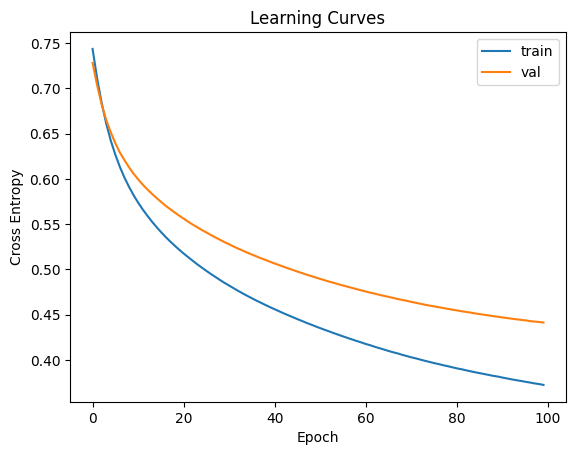

In [ ]:
# ejemplo de visualización de curvas de aprendizaje
from sklearn.datasets import make_classification
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# creación de dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# número de caracteristicas de entrada
n_features = X.shape[1]
# definición del modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compilar el modelo
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# aprendizaje
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot curvas de aprendizaje
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

*Guardar y cargar un modelo*

In [ ]:
#!pip install h5py

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#url ="/content/drive/My Drive/Colab Notebooks/MaestriaCienciaDatosV1/IntroCienciaDatos/SesionIII/"
#url ="/content/drive/My Drive/Colab Notebooks/"

In [ ]:
# ejemplo de grabar modelo entrenado

# el dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# número de características entrada
n_features = X.shape[1]
# definición modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compila el modelo
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# aprendizaje
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# Graba archivo
model.save('model.keras') #antes h5

In [ ]:
# ejemplo carga modelo grabado
from tensorflow.keras.models import load_model
# crea dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# cargar modelo de archivo
model = load_model('model.keras') # antes h5
# hacer predicción
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict(np.asarray([row]))
print('Predicho: %.3f' % yhat[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicho: 0.850


<ipython-input-61-42552cea195b>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicho: %.3f' % yhat[0])


*Reducir Overfitting con Dropout*

In [ ]:
# Ejemplo de uso dropout

# crear dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# número caracterisiticas entrada
n_features = X.shape[1]
# define el  modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.2)) #reduce overfitting
model.add(Dense(1, activation='sigmoid'))
# compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy')
# aprendizaje
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*Acelar entrenamiento con Batch Normalization*

In [ ]:
# batch normalization
from tensorflow.keras.layers import BatchNormalization

# crea el dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# número de características
n_features = X.shape[1]
# define modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization()) # realiza normalización de los datos que estan en el batch
model.add(Dense(1, activation='sigmoid'))
# compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy')
# aprendizaje
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

*Para el entrenamiento con Early Stopping*

- Poco entrenamiento provoca underfit; mucho entrenamiento provoca  overfitting. En ambos casos el resultado es un modelo menos efectivo.

- Early stopping implica monitorear la perdida de un dataset de entrenamiento y dataset de validación (subconjunto de datos no usado para entrenar). Conforme el conjunto de validación comienza a mostrar señales de overfitting, todo el entrenamiento se detiene.

In [ ]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping


# crea el dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
#  numero de características
n_features = X.shape[1]
# define modelo
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy')
# configura early stopping
es = EarlyStopping(monitor='val_loss', patience=5) #patience: número de epocas sin mejoras hasta que el entrenamiento es parado
# aprendizaje
history = model.fit(X, y, epochs=200, batch_size=32, verbose=2, validation_split=0.3, callbacks=[es])

Epoch 1/200
22/22 - 1s - loss: 0.8376 - val_loss: 0.7856 - 963ms/epoch - 44ms/step
Epoch 2/200
22/22 - 0s - loss: 0.7712 - val_loss: 0.7370 - 98ms/epoch - 4ms/step
Epoch 3/200
22/22 - 0s - loss: 0.7200 - val_loss: 0.6974 - 99ms/epoch - 5ms/step
Epoch 4/200
22/22 - 0s - loss: 0.6767 - val_loss: 0.6656 - 111ms/epoch - 5ms/step
Epoch 5/200
22/22 - 0s - loss: 0.6425 - val_loss: 0.6377 - 92ms/epoch - 4ms/step
Epoch 6/200
22/22 - 0s - loss: 0.6132 - val_loss: 0.6133 - 100ms/epoch - 5ms/step
Epoch 7/200
22/22 - 0s - loss: 0.5881 - val_loss: 0.5916 - 96ms/epoch - 4ms/step
Epoch 8/200
22/22 - 0s - loss: 0.5652 - val_loss: 0.5737 - 101ms/epoch - 5ms/step
Epoch 9/200
22/22 - 0s - loss: 0.5458 - val_loss: 0.5569 - 100ms/epoch - 5ms/step
Epoch 10/200
22/22 - 0s - loss: 0.5282 - val_loss: 0.5407 - 104ms/epoch - 5ms/step
Epoch 11/200
22/22 - 0s - loss: 0.5112 - val_loss: 0.5273 - 99ms/epoch - 4ms/step
Epoch 12/200
22/22 - 0s - loss: 0.4955 - val_loss: 0.5147 - 104ms/epoch - 5ms/step
Epoch 13/200
22/2